# 3장 후반부 코드

### 작성 : [PinkWink](http://pinkwink.kr) 

## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [59]:
from bs4 import BeautifulSoup  
import pandas as pd

In [60]:
from datetime import date

current_date = date.today().strftime('%Y%m%d')
print(current_date)

20180515


#### HTML Source 불러오기

In [61]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date="

page = urlopen(url_base+url_syb+current_date)
print(url_base+url_syb+current_date)

soup = BeautifulSoup(page, "html.parser")
soup

http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180515



<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20180515" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta cont

#### 특정 태그만 불러오기

In [62]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154667" title="덕구">덕구</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=106360" title="위대한 쇼맨">위대한 쇼맨</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=68555" title="말할 수 없는 비밀">말할 수 없는 비밀</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=146504" title="우리들">우리들</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10050" title="싸이코">싸이코</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=27219" title="박하사탕">박하사탕</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151254" title="비밥바룰라">비밥바룰라</a>
 </div>, <div class

In [63]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>
</div>

In [64]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>

In [65]:
soup.find_all('div', 'tit5')[0].a.string

'당갈'

#### TD Class의 Point 이름을 단 경우만 찾아오기

In [66]:
soup.find_all('td', 'point')

[<td class="point">9.63</td>,
 <td class="point">9.50</td>,
 <td class="point">9.41</td>,
 <td class="point">9.38</td>,
 <td class="point">9.28</td>,
 <td class="point">9.27</td>,
 <td class="point">9.22</td>,
 <td class="point">9.14</td>,
 <td class="point">9.07</td>,
 <td class="point">9.03</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.99</td>,
 <td class="point">8.98</td>,
 <td class="point">8.97</td>,
 <td class="point">8.93</td>,
 <td class="point">8.84</td>,
 <td class="point">8.83</td>,
 <td class="point">8.77</td>,
 <td class="point">8.75</td>,
 <td class="point">8.75</td>,
 <td class="point">8.73</td>,
 <td class="point">8.73</td>,
 <td class="point">8.72</td>,
 <td class="point">8.67</td>,
 <td class="point">8.60</td>,
 <td class="point">8.59</td>,
 <td class="point">8.52</td>,
 <td class="point">8.51</td>,
 <td class="point">8.48</td>,
 <td class="point">8.46</td>,
 <td class="point">8.40</td>,
 <td class="point">8.24</td>,
 <td class

In [67]:
len(soup.find_all('td', 'point'))

49

In [68]:
soup.find_all('td', 'point')[0].string

'9.63'

#### Title 만 가지고 오기

In [69]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, len(soup.find_all('td', 'point')))]
movie_name

['당갈',
 '덕구',
 '원더',
 '위대한 쇼맨',
 '킹 오브 프리즘 프라이드 더 히어로',
 '말할 수 없는 비밀',
 '우리들',
 '싸이코',
 '박하사탕',
 '비밥바룰라',
 '비긴 어게인',
 '싱 스트리트',
 '원스',
 '그날, 바다',
 '어벤져스: 인피니티 워',
 '소공녀',
 '라이프 오브 파이',
 '안녕, 나의 소울메이트',
 '본 투 비 블루',
 '현기증',
 '리틀 포레스트',
 '더 포스트',
 '지금 만나러 갑니다',
 '러덜리스',
 '오페라의 유령',
 '레디 플레이어 원',
 '라라랜드',
 '플로리다 프로젝트',
 '레이디 버드',
 '램페이지',
 '팬텀 스레드',
 '셰이프 오브 워터: 사랑의 모양',
 '꾸뻬씨의 행복여행',
 '콰이어트 플레이스',
 '나의 산티아고',
 '파리로 가는 길',
 '문호 스트레이독스 [데드애플]',
 '블랙 팬서',
 '로건 럭키',
 '콜 미 바이 유어 네임',
 '튤립 피버',
 '용순',
 '살인소설',
 '나를 기억해',
 '챔피언',
 '곤지암',
 '바람 바람 바람',
 '중2병이라도 사랑이 하고 싶어! 테이크 온 미',
 '레슬러']

In [70]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)]
movie_point

['9.63',
 '9.50',
 '9.41',
 '9.38',
 '9.28',
 '9.27',
 '9.22',
 '9.14',
 '9.07',
 '9.03',
 '9.02',
 '9.00',
 '8.99',
 '8.98',
 '8.97',
 '8.93',
 '8.84',
 '8.83',
 '8.77',
 '8.75',
 '8.75',
 '8.73',
 '8.73',
 '8.72',
 '8.67',
 '8.60',
 '8.59',
 '8.52',
 '8.51',
 '8.48',
 '8.46',
 '8.40',
 '8.24',
 '8.20',
 '8.13',
 '7.90',
 '7.75',
 '7.52',
 '7.38',
 '7.36',
 '7.33',
 '7.12',
 '6.88',
 '6.77',
 '6.61',
 '6.54',
 '6.39',
 '5.53',
 '5.07']

In [104]:
date = pd.date_range('2018-4-1', periods=50, freq='D')
date
#date_range = 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-19', '2018-05-20'],
              dtype='datetime64[ns]', freq='D')

In [105]:
type(date)

pandas.core.indexes.datetimes.DatetimeIndex

#### 영화 데이터를 다운로드 받아서 저장하기

In [106]:
import urllib
from tqdm import tqdm_notebook
#http://pinkwink.kr/1041

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [107]:
len(movie_date), len(movie_name), len(movie_point)

(2377, 2377, 2377)

In [108]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2018-04-01,원더,9.40
1,2018-04-01,위대한 쇼맨,9.38
2,2018-04-01,사운드 오브 뮤직,9.37
3,2018-04-01,빌리 엘리어트,9.28
4,2018-04-01,코코,9.22


In [109]:
movie['name'].value_counts()

안녕, 나의 소울메이트               50
플로리다 프로젝트                  50
소공녀                        50
지금 만나러 갑니다                 50
위대한 쇼맨                     50
레디 플레이어 원                  50
비밥바룰라                      50
블랙 팬서                      49
셰이프 오브 워터: 사랑의 모양          49
튤립 피버                      48
콜 미 바이 유어 네임               48
리틀 포레스트                    47
곤지암                        46
덕구                         44
비긴 어게인                     43
팬텀 스레드                     43
패터슨                        41
문호 스트레이독스 [데드애플]           41
레이디 버드                     40
램페이지                       39
라이프 오브 파이                  39
콰이어트 플레이스                  39
그날, 바다                     39
쓰리 빌보드                     37
원더                         37
바람 바람 바람                   36
B급 며느리                     34
12 솔져스                     34
더 포스트                      33
러빙 빈센트                     30
                           ..
서서평, 천천히 평온하게               5
그녀                          5
에곤 쉴레: 욕망이

In [122]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 3 columns):
date     2377 non-null datetime64[ns]
name     2377 non-null object
point    2377 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [111]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 3 columns):
date     2377 non-null datetime64[ns]
name     2377 non-null object
point    2377 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [112]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
위대한 쇼맨,468.95
비밥바룰라,452.05
소공녀,449.58
"안녕, 나의 소울메이트",441.06
지금 만나러 갑니다,437.47


In [113]:
tmp = movie.query('name == ["어벤져스: 인피니티 워"]')
tmp

,date,name,point
1136,2018-04-25,어벤져스: 인피니티 워,9.17
1183,2018-04-26,어벤져스: 인피니티 워,9.18
1233,2018-04-27,어벤져스: 인피니티 워,9.16
1283,2018-04-28,어벤져스: 인피니티 워,9.11
1335,2018-04-29,어벤져스: 인피니티 워,9.07
1386,2018-04-30,어벤져스: 인피니티 워,9.05
1435,2018-05-01,어벤져스: 인피니티 워,9.03
1485,2018-05-02,어벤져스: 인피니티 워,9.02
1536,2018-05-03,어벤져스: 인피니티 워,9.02
1586,2018-05-04,어벤져스: 인피니티 워,9.02


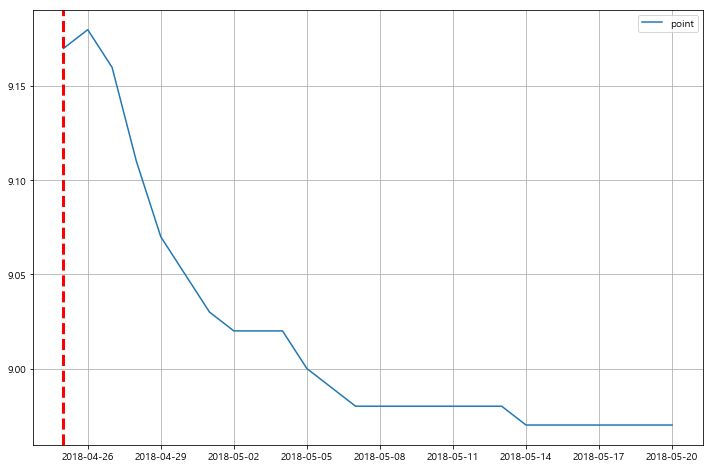

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.axvline(x='2018-04-25', color='r', linestyle='--', linewidth=3)
plt.legend(loc='best')
plt.grid()
plt.show()

In [115]:
movie_best.head(10)

,point
name,
위대한 쇼맨,468.95
비밥바룰라,452.05
소공녀,449.58
"안녕, 나의 소울메이트",441.06
지금 만나러 갑니다,437.47
레디 플레이어 원,432.98
플로리다 프로젝트,425.94
덕구,419.76
셰이프 오브 워터: 사랑의 모양,412.25


## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [117]:

movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                           \
name       12 솔져스 120BPM  4등 50가지 그림자: 해방 7년의 밤 B급 며느리   게이트   곤지암 굿모닝 맨하탄   
date                                                                         
2018-04-01   8.84   2.62 NaN         8.08  6.20   8.59  3.93  7.31     NaN   
2018-04-02   8.84   2.62 NaN         8.08  6.17   8.59  3.95  7.27     NaN   
2018-04-03   8.84   2.61 NaN         8.09  6.11   8.53  3.94  7.23    8.92   
2018-04-04   8.85   2.62 NaN         8.09  6.08   8.50  3.93  7.17    8.92   
2018-04-05   8.83   2.62 NaN         8.09  6.06   8.49  3.92  7.14    8.92   

                  ...                                                     \
name          궁합  ...    패터슨 팬텀 스레드 퍼시픽 림: 업라이징 펀치 드렁크 러브 프렌즈: 몬스터 섬의 비밀   
date              ...                                                      
2018-04-01  6.66  ...   8.31    NaN        7.31      7.93           8.89   
2018-04-02  6.66  ...   8.30    NaN        7.29      7.93           8.89   
2018-04-03  6.65  ...   8.30    NaN        7.28      7.93           8.89   
2018-04-04  6.65  ...   8.30    NaN        7.26      7.93           8.89   
2018-04-05   NaN  ...   8.30    NaN        7.26      7.93           8.89   

                                                               
name       플로리다 프로젝트 하이 스피드! –프리! 스타팅 데이즈 허리케인 하이스트 현기증 환상의 빛  
date                                                           
2018-04-01      8.50                  NaN      7.76 NaN   NaN  
2018-04-02      8.49                  NaN      7.76 NaN   NaN  
2018-04-03      8.49                  NaN      7.76 NaN   NaN  
2018-04-04      8.49                  NaN      7.70 NaN   NaN  
2018-04-05      8.50                  NaN       NaN NaN   NaN  

[5 rows x 131 columns]

In [118]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [119]:
movie_pivot.head()

name,12 솔져스,120BPM,4등,50가지 그림자: 해방,7년의 밤,B급 며느리,게이트,곤지암,굿모닝 맨하탄,궁합,...,패터슨,팬텀 스레드,퍼시픽 림: 업라이징,펀치 드렁크 러브,프렌즈: 몬스터 섬의 비밀,플로리다 프로젝트,하이 스피드! –프리! 스타팅 데이즈,허리케인 하이스트,현기증,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01,8.84,2.62,NaN,8.08,6.20,8.59,3.93,7.31,NaN,6.66,...,8.31,NaN,7.31,7.93,8.89,8.50,NaN,7.76,NaN,NaN
2018-04-02,8.84,2.62,NaN,8.08,6.17,8.59,3.95,7.27,NaN,6.66,...,8.30,NaN,7.29,7.93,8.89,8.49,NaN,7.76,NaN,NaN
2018-04-03,8.84,2.61,NaN,8.09,6.11,8.53,3.94,7.23,8.92,6.65,...,8.30,NaN,7.28,7.93,8.89,8.49,NaN,7.76,NaN,NaN
2018-04-04,8.85,2.62,NaN,8.09,6.08,8.50,3.93,7.17,8.92,6.65,...,8.30,NaN,7.26,7.93,8.89,8.49,NaN,7.70,NaN,NaN
2018-04-05,8.83,2.62,NaN,8.09,6.06,8.49,3.92,7.14,8.92,NaN,...,8.30,NaN,7.26,7.93,8.89,8.50,NaN,NaN,NaN,NaN


In [120]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

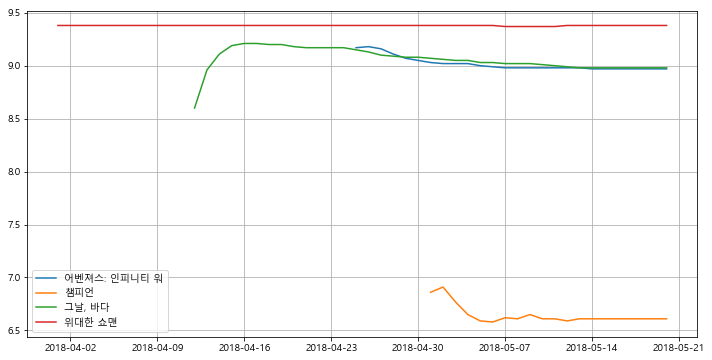

In [121]:
target_col = ['어벤져스: 인피니티 워', '챔피언', '그날, 바다', '위대한 쇼맨']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()